### **OverFitting**



# When the number of samples is small

Epoch: 1000, Cost: 0.0568
Epoch: 2000, Cost: 0.0201
Epoch: 3000, Cost: 0.0196
Epoch: 4000, Cost: 0.0143
Epoch: 5000, Cost: 0.0091
Epoch: 6000, Cost: 0.0046
Epoch: 7000, Cost: 0.0025
Epoch: 8000, Cost: 0.0013
Epoch: 9000, Cost: 0.0007
Epoch: 10000, Cost: 0.0004


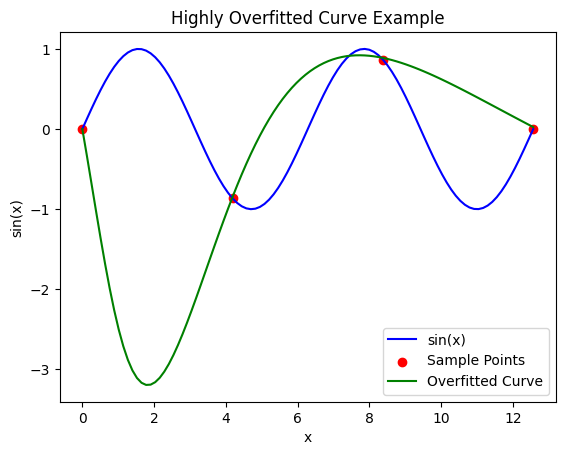

In [35]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Original data
x = np.linspace(0, 4 * np.pi, 100)
y = np.sin(x)

# Very reduced training data for overfitting
x_sampled = np.linspace(0, 4 * np.pi, 4)  # Reduce training points to 4
y_sampled = np.sin(x_sampled)

# Extremely overfitted model definition
model = nn.Sequential(
    nn.Linear(1, 500),
    nn.Tanh(),
    nn.Linear(500, 500),
    nn.Tanh(),
    nn.Linear(500, 1)
)

# Convert data to tensors
x_train = torch.from_numpy(x_sampled).float().view(-1, 1)  # Shape: (4, 1)
y_train = torch.from_numpy(y_sampled).float().view(-1, 1)  # Shape: (4, 1)

# Training setup
epochs = 10000  # Increase epochs for heavy overfitting
optimizer = optim.SGD(model.parameters(), lr=0.005)  # Lower learning rate

# Training loop
for epoch in range(epochs):
    y_pred = model(x_train)  # Model predictions
    cost = torch.nn.functional.mse_loss(y_pred, y_train)  # MSE loss
    optimizer.zero_grad()  # Zero gradients
    cost.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if epoch % 1000 == 999:
        print(f'Epoch: {epoch+1}, Cost: {cost:.4f}')

# Evaluate model on a smooth curve
x_eval = torch.linspace(0, 4 * np.pi, 100).view(-1, 1)  # Smooth x for evaluation
y_eval = model(x_eval).detach().numpy()  # Predicted y values

# Plot results
plt.title('Highly Overfitted Curve Example')
plt.plot(x, y, label='sin(x)', color='blue')  # True sin curve
plt.scatter(x_sampled, y_sampled, color='red', label='Sample Points')  # Sample points
plt.plot(x_eval.numpy(), y_eval, label='Overfitted Curve', color='green')  # Overfitted curve
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()


# When the number of samples is larger

Epoch: 1000, Cost: 0.2942
Epoch: 2000, Cost: 0.2697
Epoch: 3000, Cost: 0.2430
Epoch: 4000, Cost: 0.2204
Epoch: 5000, Cost: 0.1935
Epoch: 6000, Cost: 0.1785
Epoch: 7000, Cost: 0.4658
Epoch: 8000, Cost: 0.2175
Epoch: 9000, Cost: 0.1761
Epoch: 10000, Cost: 0.1489


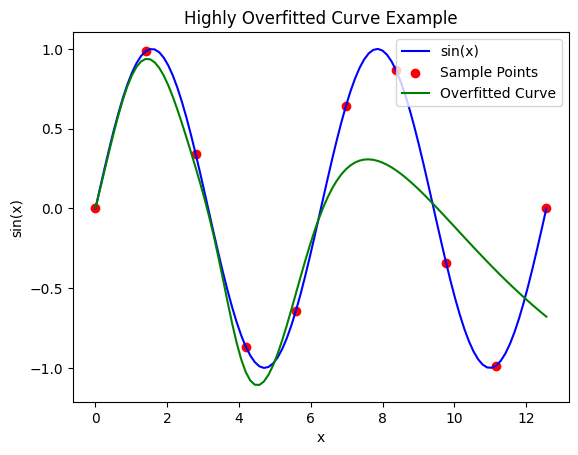

In [36]:

# Original data
x = np.linspace(0, 4 * np.pi, 100)
y = np.sin(x)

# Very reduced training data for overfitting
x_sampled = np.linspace(0, 4 * np.pi, 10)  # Reduce training points to 4
y_sampled = np.sin(x_sampled)

# Extremely overfitted model definition
model = nn.Sequential(
    nn.Linear(1, 500),
    nn.Tanh(),
    nn.Linear(500, 500),
    nn.Tanh(),
    nn.Linear(500, 1)
)

# Convert data to tensors
x_train = torch.from_numpy(x_sampled).float().view(-1, 1)  # Shape: (4, 1)
y_train = torch.from_numpy(y_sampled).float().view(-1, 1)  # Shape: (4, 1)

# Training setup
epochs = 10000  # Increase epochs for heavy overfitting
optimizer = optim.SGD(model.parameters(), lr=0.005)  # Lower learning rate

# Training loop
for epoch in range(epochs):
    y_pred = model(x_train)  # Model predictions
    cost = torch.nn.functional.mse_loss(y_pred, y_train)  # MSE loss
    optimizer.zero_grad()  # Zero gradients
    cost.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if epoch % 1000 == 999:
        print(f'Epoch: {epoch+1}, Cost: {cost:.4f}')

# Evaluate model on a smooth curve
x_eval = torch.linspace(0, 4 * np.pi, 100).view(-1, 1)  # Smooth x for evaluation
y_eval = model(x_eval).detach().numpy()  # Predicted y values

# Plot results
plt.title('Highly Overfitted Curve Example')
plt.plot(x, y, label='sin(x)', color='blue')  # True sin curve
plt.scatter(x_sampled, y_sampled, color='red', label='Sample Points')  # Sample points
plt.plot(x_eval.numpy(), y_eval, label='Overfitted Curve', color='green')  # Overfitted curve
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()


# Conclusion
 * It can be observed that the generalization performance improves when the number of samples increases.